# Table of Contents:

* [Python Libraries](#section-zero)
* [Introduction](#section-one)
    - [Data Cleaning](#subsection-one)
* [Feature Selection](#section-two)
    - [Inferences](#subsection-two)
    - [Model Selection](#subsection-three)
    - [Logistic Regression](#subsection-four)
* [Conclusion](#section-three)

<a id="section-zero"></a>
# Python Libraries:

Before starting with the code, it is necessary to import all the required Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display

<a id="section-one"></a>
# Introduction

***In this dataset we have been provided with a number of parameters which will help us to predict whether the tumor is malignant or benign.***

**The parameters provided to us are:** 
* ID number
* Diagnosis (M = malignant, B = benign)

***Ten real-valued features are computed for each cell nucleus:***
* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter^2 / area - 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension

In [2]:
df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<a id="subsection-one"></a>
# Data Cleaning and Analysis

In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
df.shape

(569, 33)

In [6]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

<AxesSubplot:>

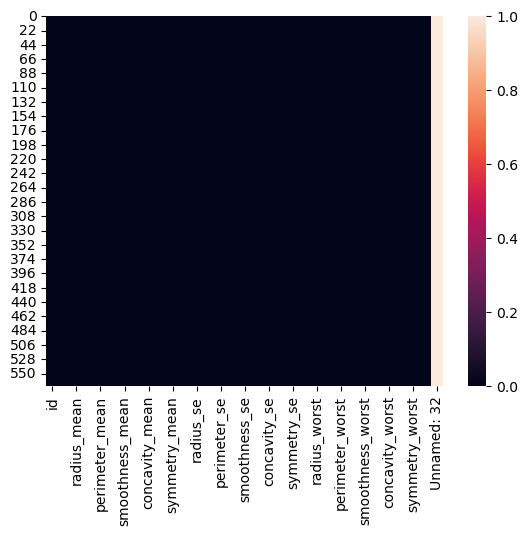

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

In [9]:
df.nunique()

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

In [10]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

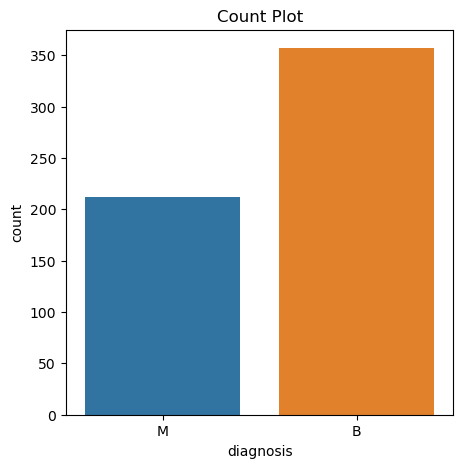

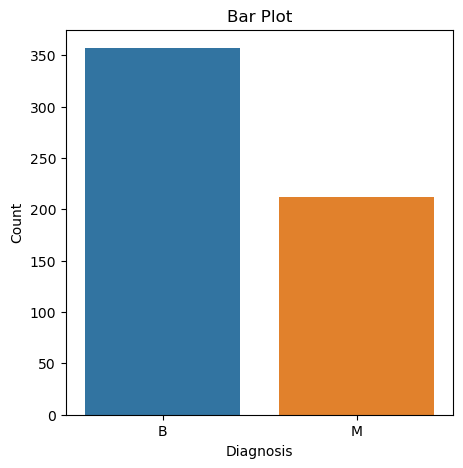

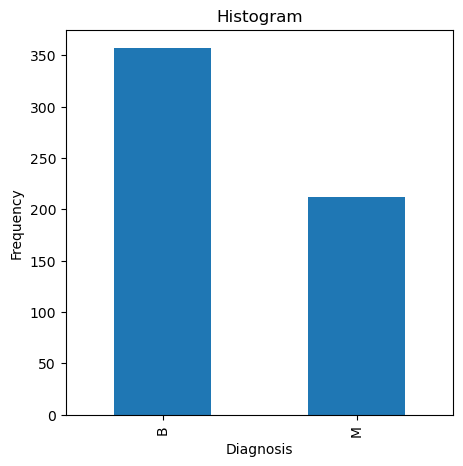

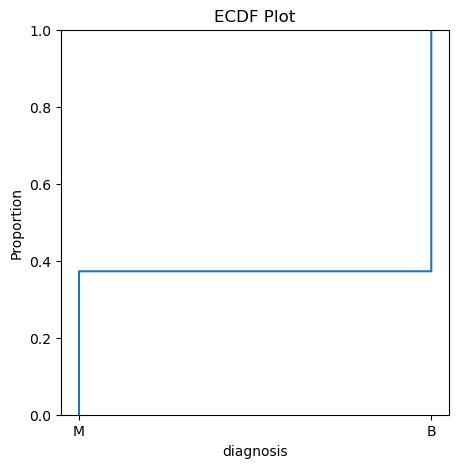

In [11]:
# Count Plot
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='diagnosis')
plt.title('Count Plot')
plt.show()

# Bar Plot
plt.figure(figsize=(5, 5))
diagnosis_counts = df['diagnosis'].value_counts()
sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values)
plt.title('Bar Plot')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

# Histogram
plt.figure(figsize=(5, 5))
df['diagnosis'].value_counts().plot(kind='bar')
plt.title('Histogram')
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')
plt.show()

# ECDF Plot
plt.figure(figsize=(5, 5))
sns.ecdfplot(data=df, x='diagnosis')
plt.title('ECDF Plot')
plt.show()

In [12]:
df['diagnosis'].replace({"M":1,"B":0},inplace=True)

In [13]:
df.shape

(569, 31)

In [14]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [15]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [16]:
import pandas as pd

def get_highly_correlated_features(df, target_column, threshold=0.5):
    
    corr_matrix = df.corr()
    target_corr = corr_matrix[target_column]
    high_corr_features = target_corr[abs(target_corr) > threshold]
    
    return high_corr_features

high_corr_features = get_highly_correlated_features(df, 'diagnosis', threshold=0.5)
print(high_corr_features)

diagnosis               1.000000
radius_mean             0.730029
perimeter_mean          0.742636
area_mean               0.708984
compactness_mean        0.596534
concavity_mean          0.696360
concave points_mean     0.776614
radius_se               0.567134
perimeter_se            0.556141
area_se                 0.548236
radius_worst            0.776454
perimeter_worst         0.782914
area_worst              0.733825
compactness_worst       0.590998
concavity_worst         0.659610
concave points_worst    0.793566
Name: diagnosis, dtype: float64


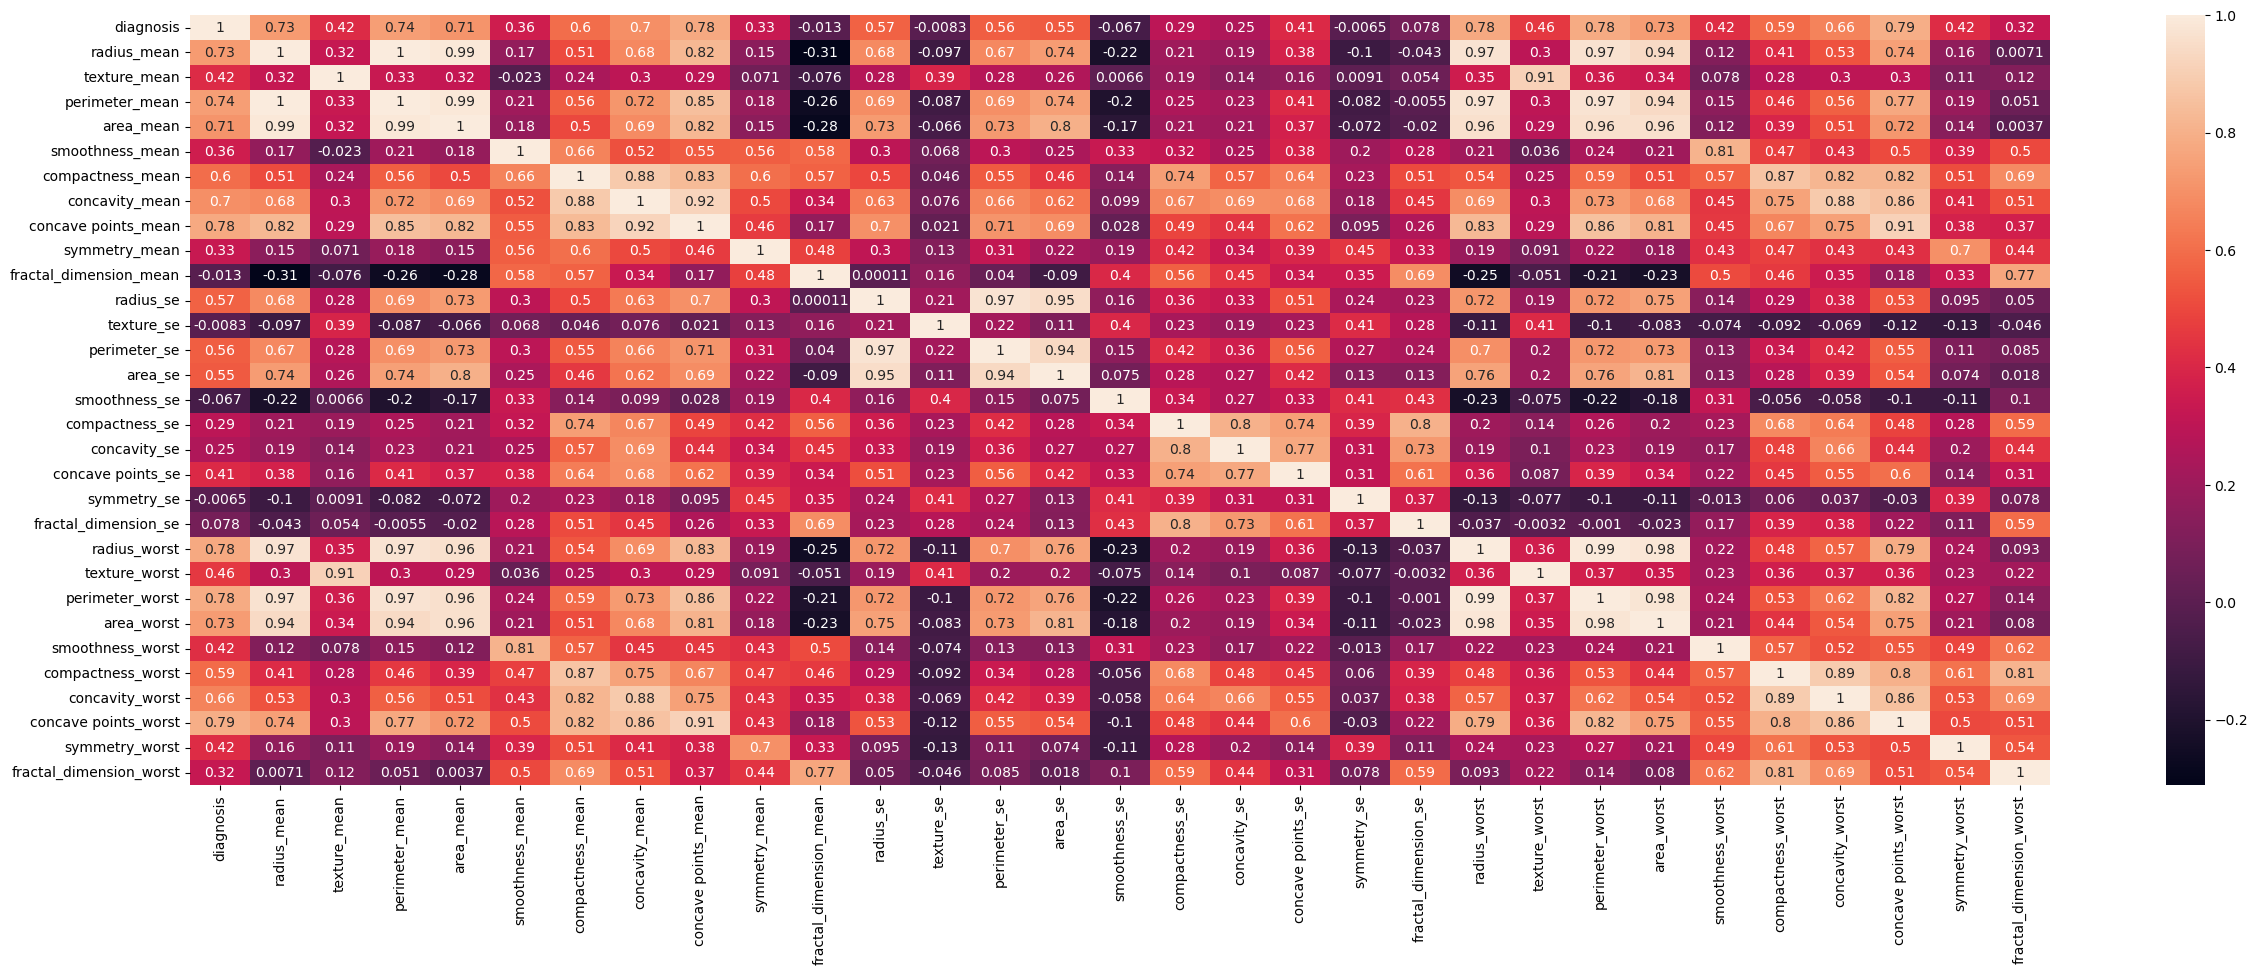

In [17]:
plt.figure(figsize=(30,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

<a id="section-two"></a>
# Feature Selection:

* Why we dropped so many columns:
   * Many columns are very less correlated to diagnosis because of which we remove them.

* Dropping ID and Unnamed: 32
   * Since they not not of relevance to us and unnecessary with Unnamed having only NaN values, we decided to drop them

In [18]:
to_drop = ['texture_mean','smoothness_mean','symmetry_mean','fractal_dimension_mean',
           'perimeter_se','smoothness_se','compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
           'fractal_dimension_se','texture_se','texture_worst', 'smoothness_worst','symmetry_worst', 'fractal_dimension_worst']
df.drop(to_drop, axis=1, inplace=True)

In [19]:
df.shape

(569, 15)

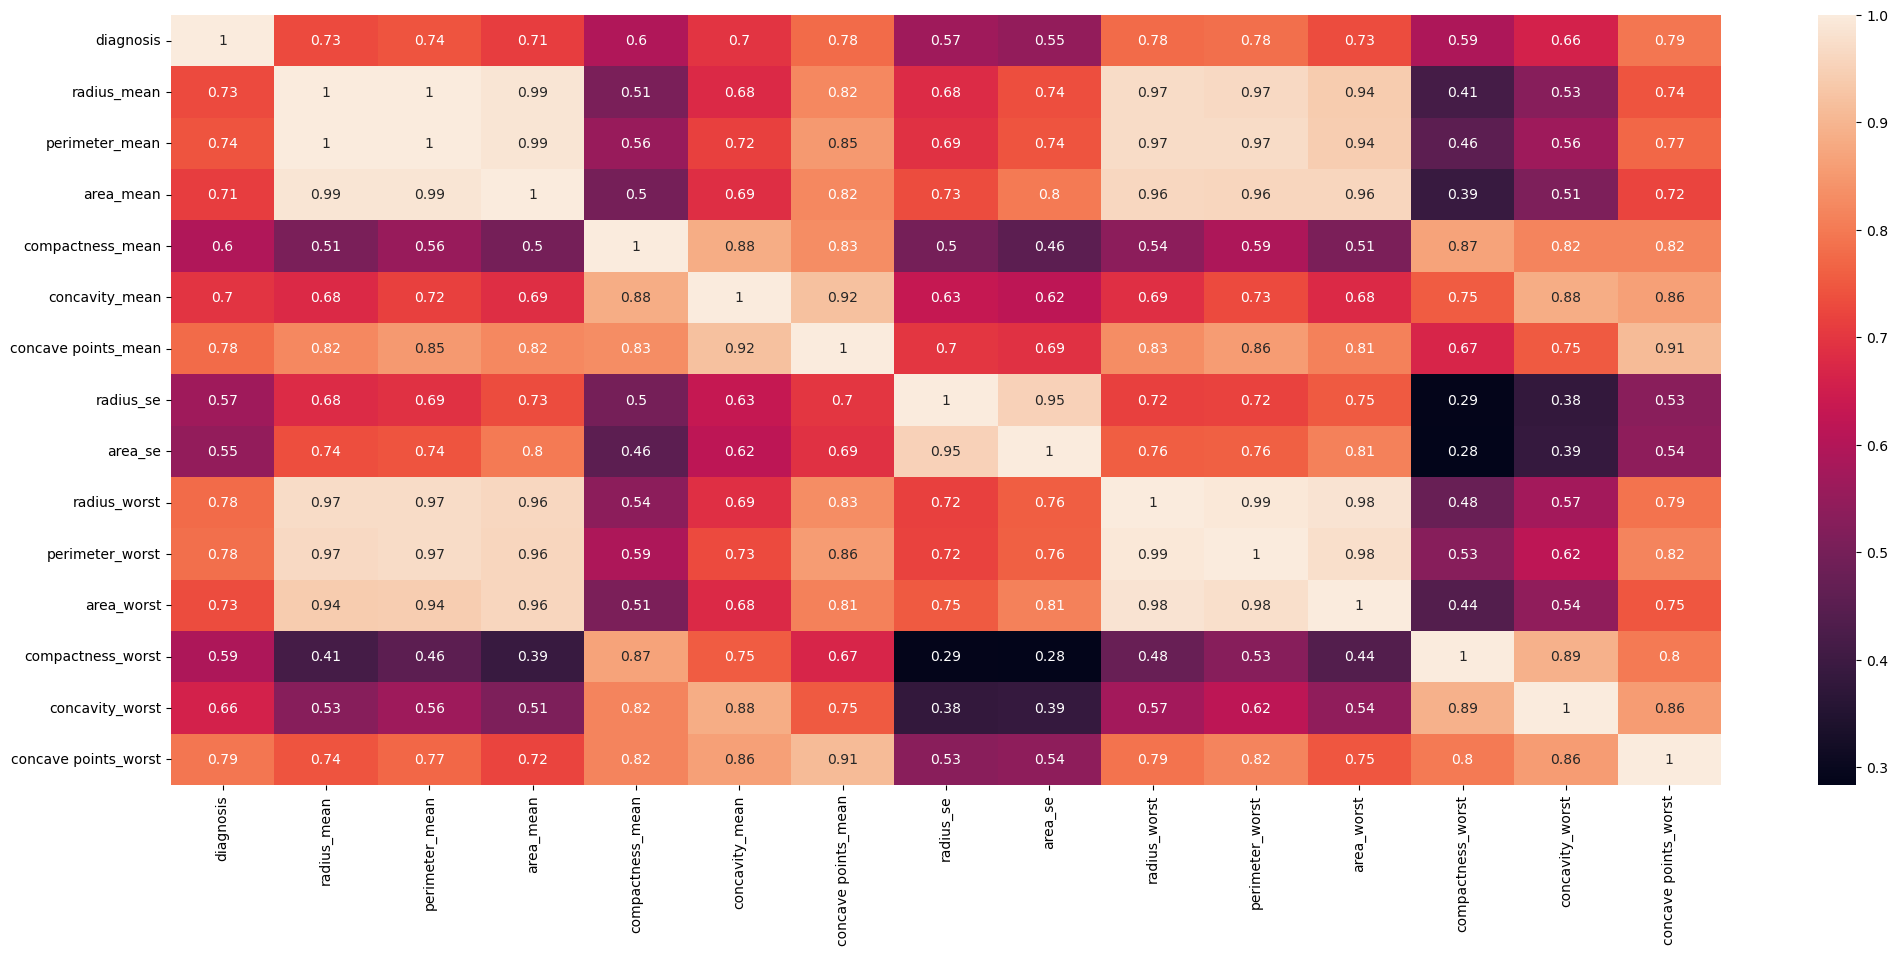

In [20]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [21]:
to_drop = ['radius_mean', 'perimeter_mean','area_se','perimeter_worst']
df.drop(to_drop, axis=1, inplace=True)

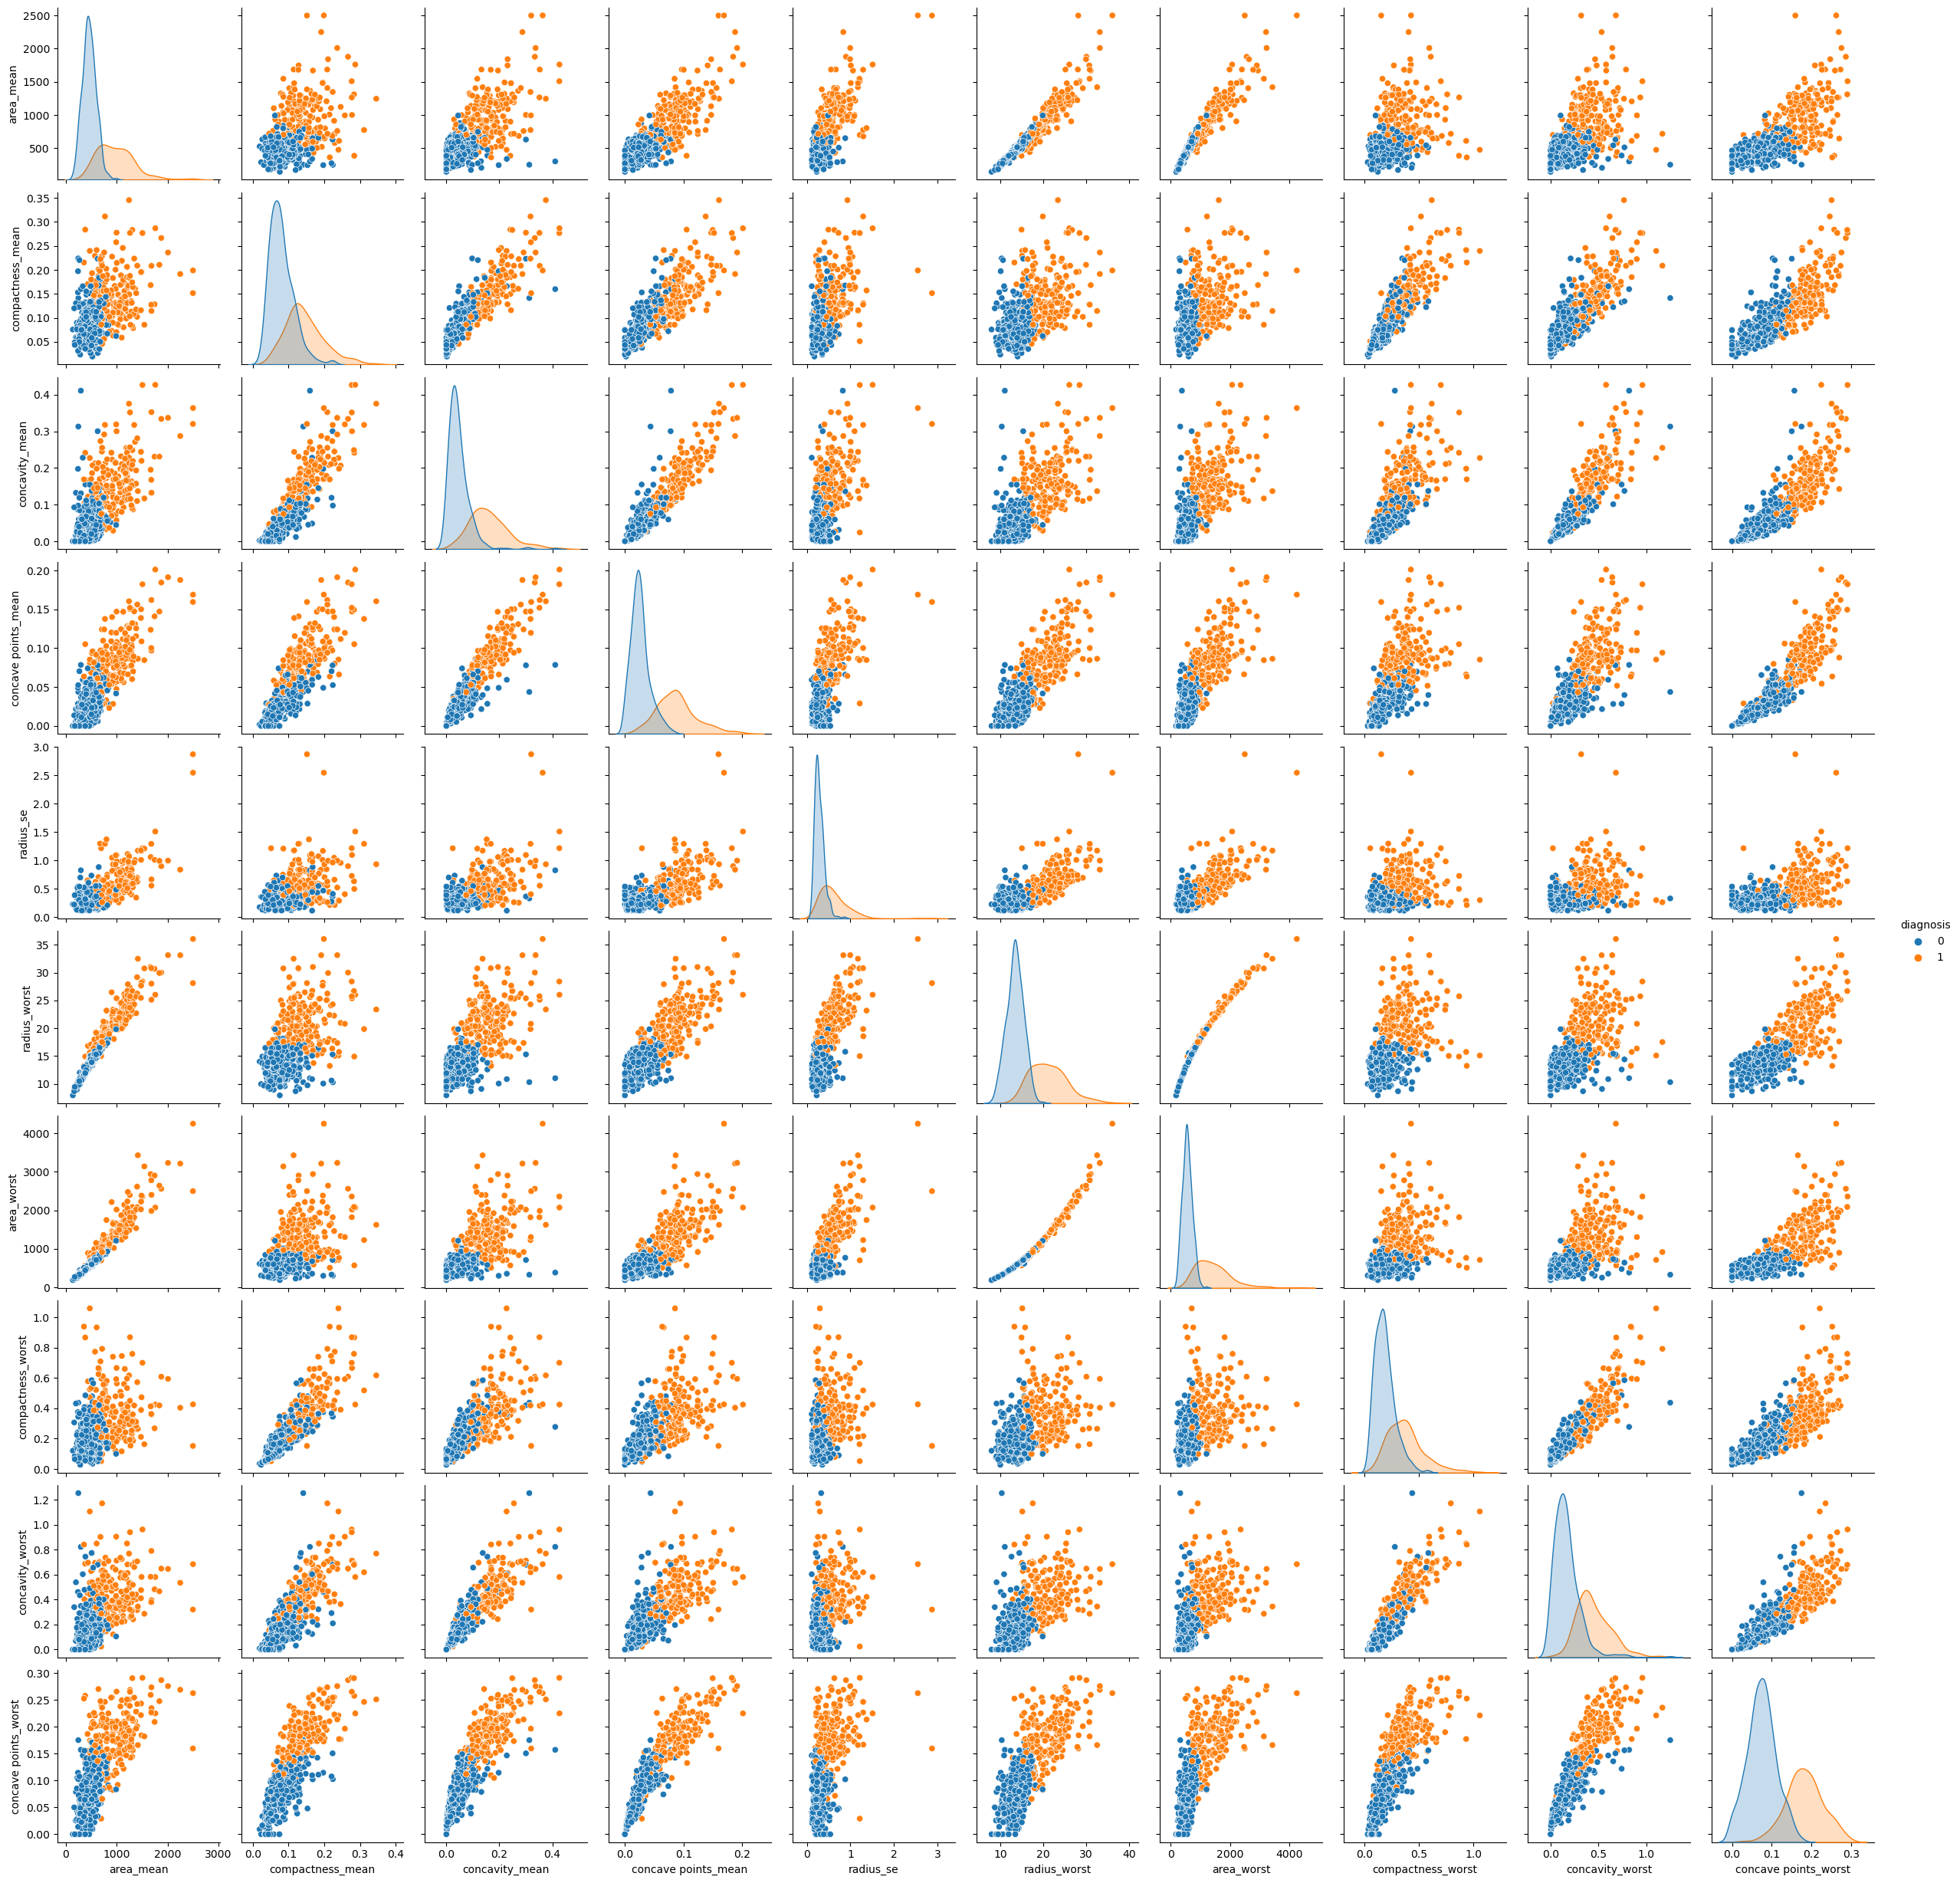

In [22]:
sns.pairplot(data=df, hue='diagnosis')

<AxesSubplot:>

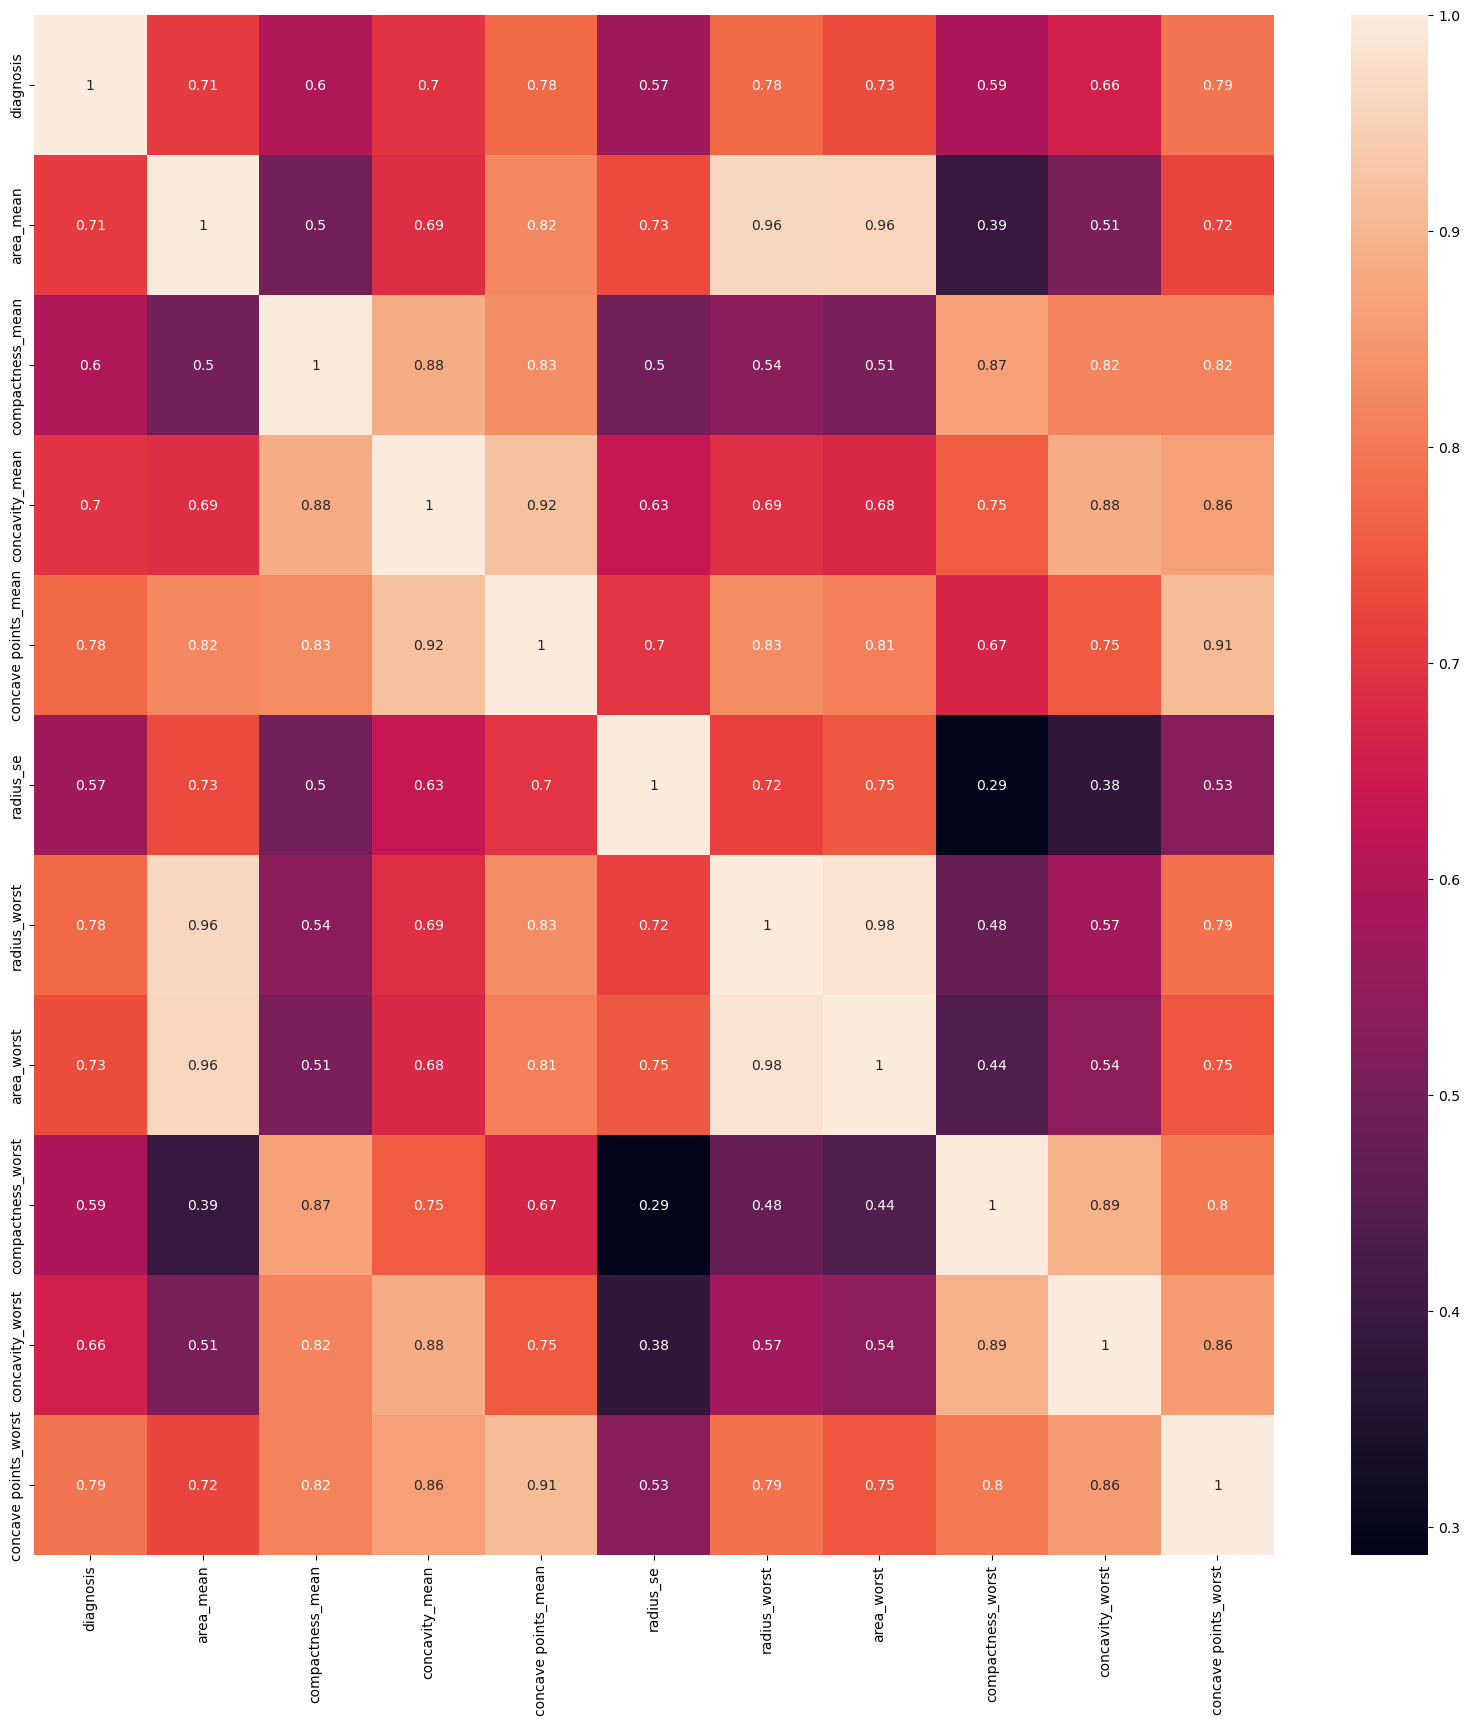

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

<a id="subsection-two"></a>
# Inferences:

* Most of the parameters are positively correlated to Diagnosis
* Only four parameters seemed to be negatively correlated to Diagnosis
* Few parameters are highly correlated to Diagnosis (>0.5)
* From the pairplot it is also observed that there are a number of outliers that are present. Thus we need to work on those outliers to get a perfect model

In [24]:
X=df.drop('diagnosis', axis=1)
y=df['diagnosis']

<a id="subsection-three"></a>
# Model Selection 

Here, we will be splitting our dataset into train and test data

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
import warnings
warnings.filterwarnings("ignore")

<a id="subsection-four"></a>
# Logistic Regression Analysis

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
clf=LogisticRegression()
parameters = {'C':[1, 10, 20, 30, 40, 50, 70, 100, 200, 300], 
              'penalty':['l1','l2','elasticnet'], 'max_iter':[100,200,300]}
clf_reg = GridSearchCV(clf, param_grid=parameters, scoring='accuracy', cv=5,)

In [28]:
clf_reg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 20, 30, 40, 50, 70, 100, 200, 300],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [29]:
print(clf_reg.best_params_)

{'C': 100, 'max_iter': 200, 'penalty': 'l2'}


In [30]:
print(clf_reg.best_score_)

0.9449077238550924


In [31]:
y_pred=clf_reg.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score, classification_report

In [33]:
accuracy=accuracy_score(y_pred, y_test)
accuracy

0.9680851063829787

In [34]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       119
           1       0.97      0.94      0.96        69

    accuracy                           0.97       188
   macro avg       0.97      0.96      0.97       188
weighted avg       0.97      0.97      0.97       188



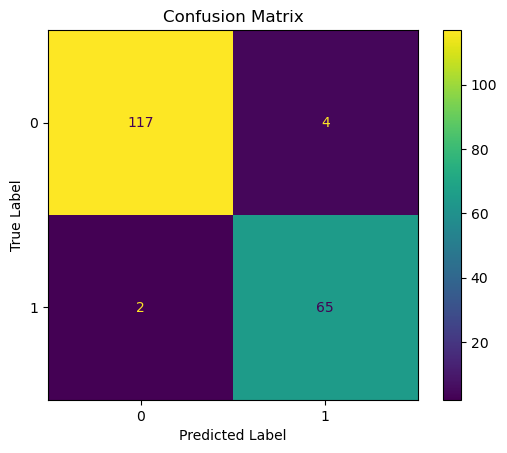

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_test, y_pred)

# Create and plot the confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Optional: Customize the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the plot
plt.show()

### The confusion matrix, also known as the error matrix, allows visualization of the performance of an algorithm :

* true positive (TP) : Malignant tumour correctly identified as malignant
* true negative (TN) : Benign tumour correctly identified as benign
* false positive (FP) : Benign tumour incorrectly identified as malignant
* false negative (FN) : Malignant tumour incorrectly identified as benign

### Metrics :

* Accuracy : (TP +TN) / (TP + TN + FP +FN)
* Precision : TP / (TP + FP)
* Recall : TP / (TP + FN)
* F-1 Score: 2 x Precision x Recall/Precision+Recall

<a id="section-three"></a>
# Final Conclusions:

1. The accuracy using Logistic Regression is really good which is nearly 97%
2. The reason why we used Logistic Regression because of binary classification
3. There were many outliers (as shown in pairplot) which we can work on to improve the accuracy of the model